# Import

In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from keras.backend import abs, sum
from keras.utils import plot_model
import tensorflow as tf

%matplotlib inline

In [2]:
# commands for google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/AML')
train_folder = "Train_Assignment_2/"

Mounted at /content/drive


# Preprocessing

In [3]:
train = pd.read_csv(train_folder+"X_train.csv")
train_label = pd.read_csv(train_folder+"y_train.csv")
test = pd.read_csv(train_folder+"X_test.csv")

In [4]:
train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.0,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0
1,252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.0,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0
2,22942,180000.0,2,5,1,44,0,0,-1,-1,-1,-1,20916.0,0.0,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0
3,619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.0,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0
4,17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.0,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,29803,50000.0,1,2,2,32,0,0,0,0,0,0,52475.0,53600.0,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
23996,5391,200000.0,1,1,2,37,2,2,2,2,2,2,157131.0,166590.0,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
23997,861,50000.0,1,1,2,26,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23998,15796,70000.0,2,2,2,25,0,0,0,0,2,2,73939.0,70488.0,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [5]:
train_label

,ID,default.payment.next.month
0,21754,0
1,252,0
2,22942,0
3,619,0
4,17091,0
...,...,...
23995,29803,0
23996,5391,1
23997,861,0
23998,15796,1


In [6]:
training_set = pd.merge(train, train_label,  how='inner', on=['ID'])
#training_set=(train-train.mean())/train.std()
training_set

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,21754,80000.0,2,2,2,24,0,0,0,0,0,0,75125.0,77353.0,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0,0
1,252,30000.0,1,2,2,28,0,0,0,0,0,0,29242.0,29507.0,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0,0
2,22942,180000.0,2,5,1,44,0,0,-1,-1,-1,-1,20916.0,0.0,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0,0
3,619,60000.0,1,1,2,25,0,0,0,0,0,0,58839.0,53235.0,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0,0
4,17091,130000.0,2,2,2,25,0,0,0,0,0,0,111587.0,112348.0,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,29803,50000.0,1,2,2,32,0,0,0,0,0,0,52475.0,53600.0,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0,0
23996,5391,200000.0,1,1,2,37,2,2,2,2,2,2,157131.0,166590.0,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0,1
23997,861,50000.0,1,1,2,26,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
23998,15796,70000.0,2,2,2,25,0,0,0,0,2,2,73939.0,70488.0,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0,1


In [7]:
training_set.drop(['ID'], axis=1, inplace=True)
training_set.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,167226.653333,1.604917,1.854000,1.551417,35.494375,-0.016667,-0.131375,-0.168167,-0.220417,-0.265167,-0.288750,50927.468417,48914.770500,4.675708e+04,43013.532167,40150.333000,38763.540458,5670.826542,5.961101e+03,5258.246500,4880.847125,4818.849250,5159.462125,0.221792
std,129734.959196,0.488879,0.792176,0.522766,9.235160,1.126473,1.197675,1.191685,1.168107,1.132949,1.152394,73400.840274,70923.493353,6.926506e+04,64069.494705,60635.882129,59281.986863,17084.401034,2.428412e+04,18242.618988,16304.718844,15619.425964,17458.604219,0.415460
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3537.000000,2989.750000,2.699500e+03,2329.000000,1763.000000,1271.750000,1000.000000,8.615000e+02,390.000000,285.750000,240.750000,112.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22321.500000,21140.500000,2.005000e+04,19010.000000,18085.000000,17108.500000,2100.000000,2.007000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66377.000000,63035.250000,5.952925e+04,53927.750000,50007.500000,49101.750000,5005.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


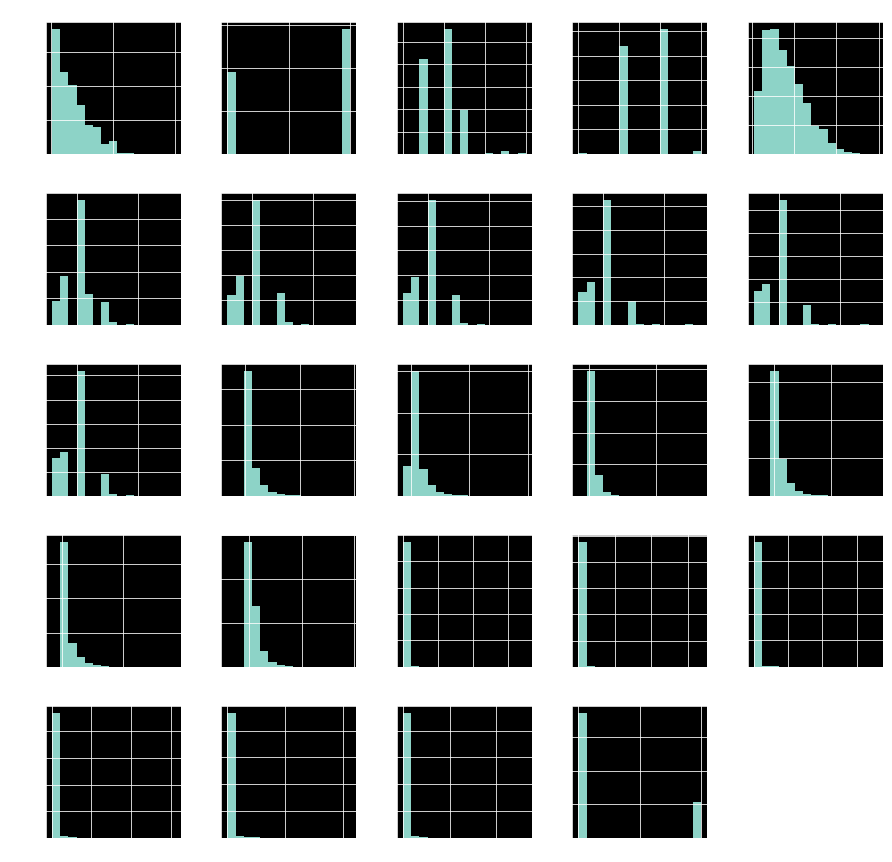

In [8]:
training_set_hist = training_set.hist(bins=15, figsize=(15,15))

In [9]:
corr = training_set.corr()
corr.style.background_gradient(cmap='bwr')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
LIMIT_BAL,1.000000,0.022468,-0.222694,-0.109410,0.149027,-0.268788,-0.297163,-0.285663,-0.268756,-0.248837,-0.235134,0.283519,0.277148,0.281470,0.292581,0.295307,0.290745,0.195353,0.171262,0.209060,0.202258,0.218756,0.223813,-0.154328
SEX,0.022468,1.000000,0.008460,-0.030239,-0.095968,-0.061592,-0.072211,-0.067700,-0.064210,-0.058703,-0.052359,-0.035774,-0.033644,-0.027506,-0.024884,-0.020701,-0.020935,-0.003785,-0.000937,-0.005696,-0.004694,-0.003605,-0.005552,-0.043076
EDUCATION,-0.222694,0.008460,1.000000,-0.139139,0.170392,0.105604,0.122386,0.113294,0.109408,0.096191,0.078335,0.021361,0.017037,0.011232,-0.003103,-0.009324,-0.010718,-0.037846,-0.029770,-0.041395,-0.039146,-0.045128,-0.039668,0.030152
MARRIAGE,-0.109410,-0.030239,-0.139139,1.000000,-0.413968,0.020772,0.027194,0.035752,0.035414,0.043635,0.040485,-0.021807,-0.019289,-0.023164,-0.021847,-0.025412,-0.020027,-0.005582,-0.008712,-0.000949,-0.013801,0.001628,-0.010443,-0.023826
AGE,0.149027,-0.095968,0.170392,-0.413968,1.000000,-0.039049,-0.048026,-0.053835,-0.050055,-0.056765,-0.051623,0.055081,0.054103,0.052662,0.050386,0.048425,0.045598,0.026449,0.020945,0.024485,0.021496,0.020516,0.018364,0.017088
PAY_0,-0.268788,-0.061592,0.105604,0.020772,-0.039049,1.000000,0.674819,0.578488,0.542034,0.510700,0.475909,0.190892,0.193454,0.182359,0.182343,0.183004,0.178879,-0.077084,-0.068846,-0.069413,-0.063703,-0.059661,-0.060536,0.325840
PAY_2,-0.297163,-0.072211,0.122386,0.027194,-0.048026,0.674819,1.000000,0.768607,0.663979,0.623256,0.573964,0.236031,0.236194,0.224340,0.222346,0.221632,0.219033,-0.080737,-0.058338,-0.057261,-0.044199,-0.039196,-0.038902,0.266825
PAY_3,-0.285663,-0.067700,0.113294,0.035752,-0.053835,0.578488,0.768607,1.000000,0.777305,0.687956,0.630131,0.213911,0.242600,0.231889,0.232377,0.229803,0.226695,0.002362,-0.064008,-0.052183,-0.042921,-0.035479,-0.035374,0.238275
PAY_4,-0.268756,-0.064210,0.109408,0.035414,-0.050055,0.542034,0.663979,0.777305,1.000000,0.820118,0.715312,0.205298,0.228236,0.247440,0.249282,0.246097,0.242702,-0.010525,-0.002408,-0.066290,-0.040970,-0.034840,-0.028571,0.220944
PAY_5,-0.248837,-0.058703,0.096191,0.043635,-0.056765,0.510700,0.623256,0.687956,0.820118,1.000000,0.814612,0.207590,0.228249,0.243761,0.273439,0.270517,0.263417,-0.005026,-0.003764,0.010962,-0.058200,-0.033812,-0.023250,0.205067


In [10]:
print('Duplicated in Training Set:', training_set.duplicated().sum())
training_set.drop_duplicates(keep=False, inplace=True) 
print('Duplicated in Training Set:', training_set.duplicated().sum())

Duplicated in Training Set: 25
Duplicated in Training Set: 0


In [11]:
training_set.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
training_set.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

# Training Set

In [13]:
neg, pos = np.bincount(training_set['default.payment.next.month'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of Total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 23950
    Positive: 5313 (22.18% of Total)



In [14]:
train_label = training_set['default.payment.next.month'].to_frame()

In [15]:
training_set.drop(['default.payment.next.month'], axis=1, inplace=True)
#training_set.drop(['PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1, inplace=True)

# Standardization

In [16]:
#training_set=(training_set-training_set.mean())/training_set.std()

In [17]:
from sklearn import preprocessing

x = training_set.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
training_set = pd.DataFrame(x_scaled)

# Validation Set

In [18]:
X_train, X_val, y_train, y_val = train_test_split(training_set, train_label, test_size=0.2, shuffle=True, stratify=train_label, random_state=2020)
print('X_train Dimensions:', X_train.shape)
print('y_train Dimensions:', y_train.shape)
print('X_validation Dimensions:', X_val.shape)
print('y_validation Dimensions:', y_val.shape)

X_train Dimensions: (19160, 23)
y_train Dimensions: (19160, 1)
X_validation Dimensions: (4790, 23)
y_validation Dimensions: (4790, 1)


# Keras

In [19]:
dims = X_train.shape[1]
nb_classes = y_train.shape[1]

In [28]:
def build_model(optimizer='adam', init_mode='glorot_normal', dropout_rate=0.3, kernel_mode=None):
    model = Sequential()
    model.add(Dense(32, input_shape=(dims,), activation = "relu", kernel_initializer=init_mode, kernel_regularizer=kernel_mode))
    model.add(Dropout(dropout_rate))  
    model.add(Dense(16, activation = "relu", kernel_initializer=init_mode, kernel_regularizer=kernel_mode))
    model.add(Dropout(dropout_rate))
    model.add(Dense(nb_classes, activation = "sigmoid", kernel_initializer=init_mode, kernel_regularizer=kernel_mode))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
    return model

# Grid Search

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [21]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
def algorithm_pipeline(X_train, y_train, 
                       model, param_grid, cv=3):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv,
        n_jobs=-1, 
        verbose=2
    )
    fitted_model = gs.fit(X_train, y_train)
    
    return fitted_model

# Dropout

In [23]:
param_grid = {
              'epochs':[25, 50],
              'batch_size':[32, 64],
              'optimizer':['adam', 'sgd'],
              'init_mode':['glorot_normal', 'glorot_uniform'],
              'dropout_rate':[0.0, 0.3]
              #'kernel_mode':[None, (regularizers.l1(0.01)), (regularizers.l2(0.01))]
             }

In [24]:
model = KerasClassifier(build_fn=build_model, verbose=0)
model = algorithm_pipeline(X_train, y_train, model, param_grid)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 13.9min finished


In [27]:
print("Best: %f using %s" % (model.best_score_, model.best_params_))

Best: 0.819572 using {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 50, 'init_mode': 'glorot_normal', 'optimizer': 'adam'}


In [29]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
params = model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.817537 (0.000591) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 25, 'init_mode': 'glorot_normal', 'optimizer': 'adam'}
0.809812 (0.000479) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 25, 'init_mode': 'glorot_normal', 'optimizer': 'sgd'}
0.818424 (0.000857) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 25, 'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
0.808142 (0.002836) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 25, 'init_mode': 'glorot_uniform', 'optimizer': 'sgd'}
0.816858 (0.000633) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 50, 'init_mode': 'glorot_normal', 'optimizer': 'adam'}
0.814770 (0.002301) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 50, 'init_mode': 'glorot_normal', 'optimizer': 'sgd'}
0.817171 (0.000515) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 50, 'init_mode': 'glorot_uniform', 'optimizer': 'adam'}
0.814301 (0.002664) with: {'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 50, 'in

In [31]:
batch_size = 32
epochs = 50

x_plot = list(range(1,epochs+1))
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

In [32]:
model_d = build_model(optimizer='adam', init_mode='glorot_normal', dropout_rate=0.3, kernel_mode=None)
    
history_d = model_d.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Epoch 1/50
599/599 - 1s - loss: 0.5193 - accuracy: 0.7804 - val_loss: 0.4736 - val_accuracy: 0.7973
Epoch 2/50
599/599 - 1s - loss: 0.4792 - accuracy: 0.7975 - val_loss: 0.4582 - val_accuracy: 0.8129
Epoch 3/50
599/599 - 1s - loss: 0.4690 - accuracy: 0.8056 - val_loss: 0.4553 - val_accuracy: 0.8163
Epoch 4/50
599/599 - 1s - loss: 0.4647 - accuracy: 0.8063 - val_loss: 0.4500 - val_accuracy: 0.8182
Epoch 5/50
599/599 - 1s - loss: 0.4597 - accuracy: 0.8086 - val_loss: 0.4471 - val_accuracy: 0.8184
Epoch 6/50
599/599 - 1s - loss: 0.4579 - accuracy: 0.8094 - val_loss: 0.4462 - val_accuracy: 0.8177
Epoch 7/50
599/599 - 1s - loss: 0.4550 - accuracy: 0.8124 - val_loss: 0.4450 - val_accuracy: 0.8205
Epoch 8/50
599/599 - 1s - loss: 0.4550 - accuracy: 0.8117 - val_loss: 0.4456 - val_accuracy: 0.8184
Epoch 9/50
599/599 - 1s - loss: 0.4534 - accuracy: 0.8110 - val_loss: 0.4422 - val_accuracy: 0.8207
Epoch 10/50
599/599 - 1s - loss: 0.4509 - accuracy: 0.8165 - val_loss: 0.4426 - val_accuracy: 0.8217

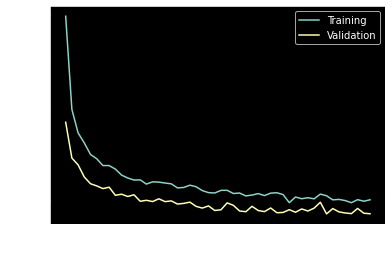

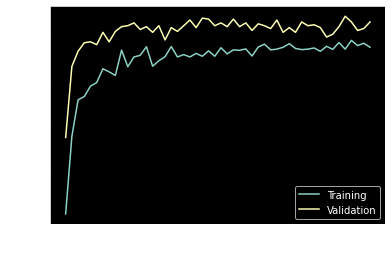

In [33]:
plot_history(history_d)

# L1 Model

In [34]:
param_grid = {
              'kernel_mode':[None, regularizers.l1(0.01), regularizers.l1(0.001)]
             }

In [35]:
model = KerasClassifier(build_fn=build_model, verbose=0)
model = algorithm_pipeline(X_train, y_train, model, param_grid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    9.8s finished


In [36]:
print("Best: %f using %s" % (model.best_score_, model.best_params_))

Best: 0.782881 using {'kernel_mode': None}


In [37]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
params = model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.782881 (0.004179) with: {'kernel_mode': None}
0.778184 (0.001723) with: {'kernel_mode': <tensorflow.python.keras.regularizers.L1 object at 0x7ff1e36ce898>}
0.781107 (0.005135) with: {'kernel_mode': <tensorflow.python.keras.regularizers.L1 object at 0x7ff1e36ce908>}


In [38]:
model_l1 = build_model(optimizer='adam', init_mode='glorot_normal', dropout_rate=0.3, kernel_mode=(regularizers.l1(0.001)))
    
history_l1 = model_l1.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Epoch 1/50
599/599 - 1s - loss: 0.6235 - accuracy: 0.7770 - val_loss: 0.5449 - val_accuracy: 0.7781
Epoch 2/50
599/599 - 1s - loss: 0.5408 - accuracy: 0.7820 - val_loss: 0.5184 - val_accuracy: 0.7852
Epoch 3/50
599/599 - 1s - loss: 0.5208 - accuracy: 0.7908 - val_loss: 0.5024 - val_accuracy: 0.7971
Epoch 4/50
599/599 - 1s - loss: 0.5097 - accuracy: 0.7974 - val_loss: 0.4942 - val_accuracy: 0.8071
Epoch 5/50
599/599 - 1s - loss: 0.5068 - accuracy: 0.7991 - val_loss: 0.4895 - val_accuracy: 0.8079
Epoch 6/50
599/599 - 1s - loss: 0.5020 - accuracy: 0.8017 - val_loss: 0.4860 - val_accuracy: 0.8094
Epoch 7/50
599/599 - 1s - loss: 0.5021 - accuracy: 0.8008 - val_loss: 0.4848 - val_accuracy: 0.8115
Epoch 8/50
599/599 - 1s - loss: 0.4976 - accuracy: 0.8023 - val_loss: 0.4864 - val_accuracy: 0.8063
Epoch 9/50
599/599 - 1s - loss: 0.4978 - accuracy: 0.8011 - val_loss: 0.4819 - val_accuracy: 0.8150
Epoch 10/50
599/599 - 1s - loss: 0.4955 - accuracy: 0.8036 - val_loss: 0.4806 - val_accuracy: 0.8175

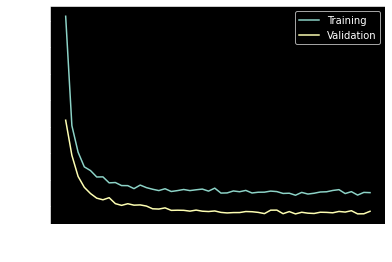

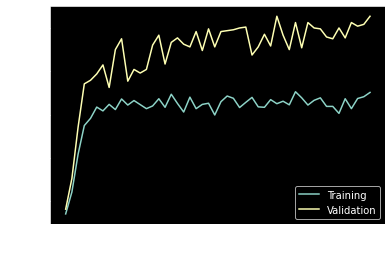

In [39]:
plot_history(history_l1)

# L2

In [40]:
param_grid = {
              'kernel_mode':[None, (regularizers.l2(0.01)), (regularizers.l2(0.001))]
             }

In [41]:
model = KerasClassifier(build_fn=build_model, verbose=0)
model = algorithm_pipeline(X_train, y_train, model, param_grid)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    9.7s finished


In [42]:
print("Best: %f using %s" % (model.best_score_, model.best_params_))

Best: 0.787579 using {'kernel_mode': None}


In [43]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
params = model.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.787579 (0.007645) with: {'kernel_mode': None}
0.778184 (0.001723) with: {'kernel_mode': <tensorflow.python.keras.regularizers.L2 object at 0x7ff1e0b09a20>}
0.781733 (0.001160) with: {'kernel_mode': <tensorflow.python.keras.regularizers.L2 object at 0x7ff1e0b09e10>}


In [44]:
model_l2 = build_model(optimizer='adam', init_mode='glorot_normal', dropout_rate=0.3, kernel_mode=(regularizers.l2(0.001)))
    
history_l2 = model_l2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_val, y_val))

Epoch 1/50
599/599 - 1s - loss: 0.5503 - accuracy: 0.7792 - val_loss: 0.4963 - val_accuracy: 0.7908
Epoch 2/50
599/599 - 1s - loss: 0.5020 - accuracy: 0.7963 - val_loss: 0.4825 - val_accuracy: 0.8102
Epoch 3/50
599/599 - 1s - loss: 0.4899 - accuracy: 0.8035 - val_loss: 0.4729 - val_accuracy: 0.8100
Epoch 4/50
599/599 - 1s - loss: 0.4828 - accuracy: 0.8058 - val_loss: 0.4691 - val_accuracy: 0.8136
Epoch 5/50
599/599 - 1s - loss: 0.4773 - accuracy: 0.8098 - val_loss: 0.4668 - val_accuracy: 0.8134
Epoch 6/50
599/599 - 1s - loss: 0.4780 - accuracy: 0.8079 - val_loss: 0.4674 - val_accuracy: 0.8123
Epoch 7/50
599/599 - 1s - loss: 0.4762 - accuracy: 0.8082 - val_loss: 0.4657 - val_accuracy: 0.8190
Epoch 8/50
599/599 - 1s - loss: 0.4752 - accuracy: 0.8078 - val_loss: 0.4655 - val_accuracy: 0.8180
Epoch 9/50
599/599 - 1s - loss: 0.4762 - accuracy: 0.8073 - val_loss: 0.4656 - val_accuracy: 0.8115
Epoch 10/50
599/599 - 1s - loss: 0.4746 - accuracy: 0.8081 - val_loss: 0.4645 - val_accuracy: 0.8177

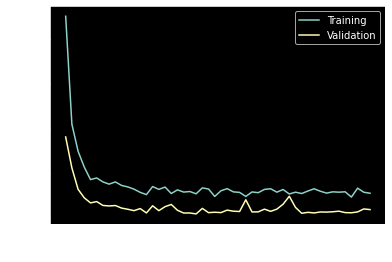

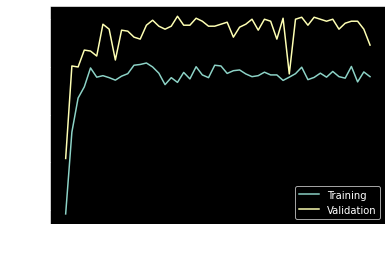

In [45]:
plot_history(history_l2)

# Weights Control

In [46]:
print('Sum of the Values of the Weights with Dropout:', 
      sum(abs(model_d.weights[0][0])).numpy()+sum(abs(model_d.weights[2][0])).numpy()++sum(abs(model_d.weights[4][0])).numpy())
print('Sum of the Values of the Weights with L1:', 
      sum(abs(model_l1.weights[0][0])).numpy()+sum(abs(model_l1.weights[2][0])).numpy()++sum(abs(model_l1.weights[4][0])).numpy())
print('Sum of the Values of the Weights with L2:', 
      sum(abs(model_l2.weights[0][0])).numpy()+sum(abs(model_l2.weights[2][0])).numpy()++sum(abs(model_l2.weights[4][0])).numpy())

Sum of the Values of the Weights with Dropout: 19.323332
Sum of the Values of the Weights with L1: 1.8119763
Sum of the Values of the Weights with L2: 4.247414


# Predictions

In [47]:
test.drop(['ID'], axis=1, inplace=True)
test.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168515.000000,1.599000,1.849667,1.553667,35.450000,-0.016833,-0.143333,-0.158333,-0.221667,-0.270333,-0.300500,52406.780833,50236.293833,48037.445500,44260.616167,40955.672833,39304.640167,5634.596333,5761.414167,5095.421500,4606.995833,4721.541167,5439.664333
std,129804.158748,0.490142,0.783051,0.518811,9.149232,1.113144,1.195280,1.217447,1.173354,1.134226,1.140358,74562.970408,72162.483421,69682.063894,65371.581858,61438.887878,60633.455058,14291.261596,17191.910749,14794.321136,12796.017970,13830.882694,18999.354760
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-14386.000000,-13543.000000,-11925.000000,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3713.500000,2932.750000,2598.750000,2314.250000,1764.250000,1159.750000,1000.000000,750.000000,399.250000,316.000000,279.000000,132.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22719.500000,21352.000000,20293.500000,19185.000000,18163.500000,16823.000000,2200.000000,2021.500000,1893.500000,1567.000000,1504.000000,1502.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69965.250000,67077.750000,63667.500000,56358.250000,50754.000000,49584.750000,5017.250000,5000.000000,4575.750000,4200.000000,4100.000000,4200.000000
max,800000.000000,2.000000,6.000000,3.000000,72.000000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,653062.000000,671563.000000,693131.000000,706864.000000,489200.000000,527566.000000,302000.000000,384986.000000,344261.000000,330982.000000,303512.000000,528666.000000


In [ ]:
#test.drop(['PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis=1, inplace=True)
#test=(test-test.mean())/test.std()

In [48]:
x = test.values 
x_scaled = min_max_scaler.fit_transform(x)
test = pd.DataFrame(x_scaled)

In [53]:
y_test = (model_d.predict(test) > 0.5).astype("int32")
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [54]:
np.savetxt('y_test_ass2.txt', y_test, delimiter='\n', fmt='%d') 